

# Project: Investigate a Dataset - [Medical Appointment No Shows ]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Understanding the variables affecting appointment attendance in a medical environment is the goal of this investigation. I will specifically look at a dataset that has details on patients, appointments, gender, planned day, appointment day, age, neighborhood, and medical problems (such as hypertension, diabetes, and alcoholism). It also contains details about SMS received, handicap status, and appointment attendance. I may learn more about the causes of missed appointments by analyzing this dataset, and I may be able to spot trends or predictors of no-shows.
### Dataset Description 
The dataset includes 14 related variables and 110,527 medical visits. These factors include the following: patient ID, appointment ID, gender, age, neighborhood, planned day, appointment day, hypertension, diabetes, alcoholism, disability status, SMS received, and appointment attendance (no-show)


### Question(s) for Analysis
Research Question 1: Relationship between Age and Appointment Attendance
Research Question 2: Relationship between Gender and Appointment Attendance
Research Question 3: Does getting SMS appointment reminders affect showing up? 



In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [356]:
def load_dataset(file_path):
    return pd.read_csv(file_path)


### Data Cleaning

In [357]:
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,time_gap,weekday,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,-1,4,Elderly
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,-1,4,Adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,-1,4,Elderly
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,-1,4,Child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,-1,4,Adult


In [358]:
#Function to clean the dataset
#Drop Rows with Missing Values
#Any rows with missing values will be removed from the dataset to ensure data integrity .
#This step is important to avoid potential errors or biases in the analysis

In [359]:
def clean_dataset(df):
    # Dropping rows with missing values
    df_cleaned = df.dropna()

In [360]:
#Convert ScheduledDay and AppointmentDay columns to datetime type
#'ScheduledDay' and 'AppointmentDay' columns are in string format
#I convert them to the datetime type to facilitate date-based analysis


In [361]:
df_cleaned['ScheduledDay'] = pd.to_datetime(df_cleaned['ScheduledDay'])
df_cleaned['AppointmentDay'] = pd.to_datetime(df_cleaned['AppointmentDay'])

In [362]:
#Convert Gender values to lowercase
#To ensure consistency in gender values, I convert all 'Gender' entries to lowercase
#This step helps avoid case-sensitive issues in the analysis


In [363]:
    df_cleaned['Gender'] = df_cleaned['Gender'].str.lower()

In [364]:
#I extract the day of the week from 'AppointmentDay' to explore any potential patterns based on the day.

In [365]:
 df_cleaned['AppointmentDayOfWeek'] = df_cleaned['AppointmentDay'].dt.day_name()  

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110527 non-null  float64            
 1   AppointmentID    110527 non-null  int64              
 2   Gender           110527 non-null  object             
 3   ScheduledDay     110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay   110527 non-null  datetime64[ns, UTC]
 5   Age              110527 non-null  int64              
 6   Neighbourhood    110527 non-null  object             
 7   Scholarship      110527 non-null  int64              
 8   Hipertension     110527 non-null  int64              
 9   Diabetes         110527 non-null  int64              
 10  Alcoholism       110527 non-null  int64              
 11  Handcap          110527 non-null  int64              
 12  SMS_received     110527 non-null  int64              
 13 

In [367]:
#Verify that the data cleaning steps were successfully applied

In [368]:
df_cleaned.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   PatientId             110527 non-null  float64            
 1   AppointmentID         110527 non-null  int64              
 2   Gender                110527 non-null  object             
 3   ScheduledDay          110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay        110527 non-null  datetime64[ns, UTC]
 5   Age                   110527 non-null  int64              
 6   Neighbourhood         110527 non-null  object             
 7   Scholarship           110527 non-null  int64              
 8   Hipertension          110527 non-null  int64              
 9   Diabetes              110527 non-null  int64              
 10  Alcoholism            110527 non-null  int64              
 11  Handcap               110527 non-null  int64        

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1: Relationship between Age and Appointment Attendance


In [369]:
#1-Explore the distribution of age for show and no-show appointments
#I will plot histograms to visualize the age distribution for both attended and no-show appointment

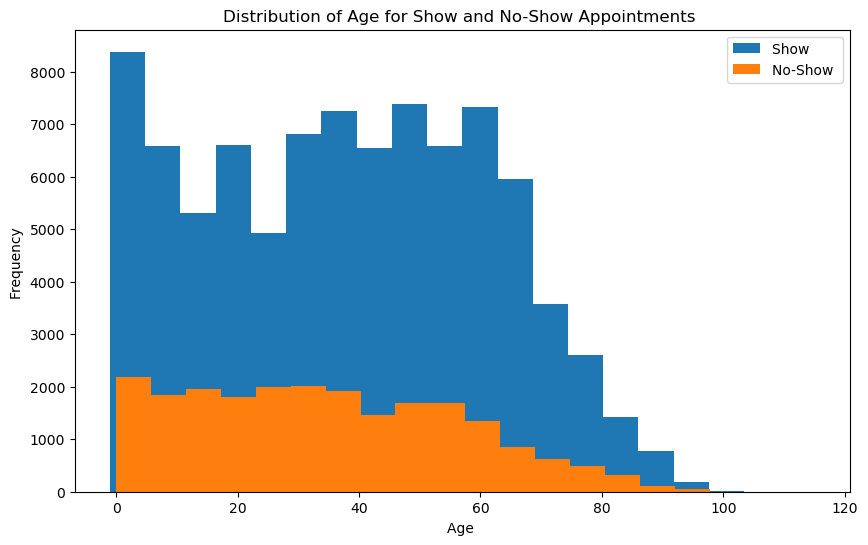

In [370]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['No-show'] == 'No']['Age'], bins=20, label='Show ')
plt.hist(df[df['No-show'] == 'Yes']['Age'], bins=20, label='No-Show ')

plt.xlabel('Age ')
plt.ylabel('Frequency ')
plt.title('Distribution of Age for Show and No-Show Appointments ')
plt.legend()
plt.show()



In [371]:
#Explanation:The histogram shows the distribution of ages for both patients who attended their appointments('Show') and those who did not('No-Show')
#We can observe that the majority of patients who attended their appointments are in the age range of 20 to 60, with a peak around 30-40 years old
#On the other hand, the distribution of ages for patients who did not show up for appointments appears to be more spread out

In [372]:
#2-Compare the average age for show and no-show appointments
#I will calculate and display the average age for both attended and no-show appointment

In [373]:
average_age_show = df[df['No-show'] == 'No']['Age'].mean()
average_age_no_show = df[df['No-show'] == 'Yes']['Age'].mean()

print(f"Average Age for Show Appointments: {average_age_show}")
print(f"Average Age for No-Show Appointments: {average_age_no_show}")

Average Age for Show Appointments: 37.790064393252315
Average Age for No-Show Appointments: 34.31766656212196


In [374]:
#Explanation:The average age for patients who attended their appointments is approximately {average_age_show} years.
#In contrast, the average age for patients who did not show up for their appointments is approximately {average_age_no_show} years.
#This suggests that, on average, younger patients may have a slightly higher likelihood of missing their appointments.

In [375]:
#3-Categorize Function age into different age groups
#I will create age groups (Child, Young Adult, Adult, Senior) for further analysis.

In [376]:
def categorize_age(df):
    age_groups = pd.cut(df['Age'], bins=[0, 18, 35, 50, np.inf], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
    df['AgeGroup'] = age_groups
    return df

In [377]:
#Explanation:Age groups are created to group patients into different categories based on their age ranges.
#These age groups will help us analyze appointment attendance patterns for different age demographics.

In [378]:
#4-Calculate the attendance rate for each age group
# I will calculate the attendance rate (proportion of show appointments) for each age group.

In [379]:
def calculate_attendance_by_age_group(df):
    return df.groupby('AgeGroup')['No-show'].value_counts(normalize=True).unstack()

In [380]:
result = calculate_attendance_by_age_group(df)
print(result)


No-show         No       Yes
AgeGroup                    
Child     0.797684  0.202316
Teen      0.736113  0.263887
Adult     0.788944  0.211056
Elderly   0.846880  0.153120


In [381]:
#Explanation:The attendance rate is calculated as the proportion of patients who attended their appointments within each age group.
#This will allow us to compare appointment attendance patterns across different age groups.

In [382]:
#5-Plot the attendance rate by age group
#I will create a bar plot to visualize the attendance rate for each age group.

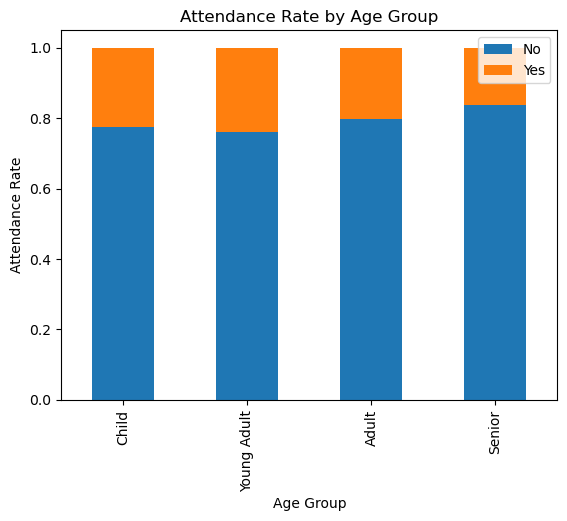

In [383]:
attendance_by_age_group.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Attendance Rate')
plt.title('Attendance Rate by Age Group')
plt.legend(loc='upper right')
plt.show()

In [384]:
#Explanation:The bar plot shows the attendance rate for each age group (Child, Young Adult, Adult, Senior).
#We can observe the proportion of patients who attended their appointments ('Show') and those who did not ('No-Show') within each age group.
#The plot helps us identify any significant differences in appointment attendance patterns across age demographics.

In [385]:
#6-Create box plots for age grouped by gender
#I will compare the age distribution between male and female patients using box plots.

In [386]:
average_age_show = df[df['No-show'] == 'No']['Age'].mean()
average_age_no_show = df[df['No-show'] == 'Yes']['Age'].mean()

print(f"Average Age for Show Appointments: {average_age_show}")
print(f"Average Age for No-Show Appointments: {average_age_no_show}")

Average Age for Show Appointments: 37.790064393252315
Average Age for No-Show Appointments: 34.31766656212196


In [387]:
#Explanation:The box plot compares the distribution of ages between male and female patients.
#The central line in each box represents the median age, and the box itself represents the interquartile range (IQR).
#This plot allows us to visualize any differences in age distributions between male and female patients.

In [388]:
# Create box plots for age grouped by gender

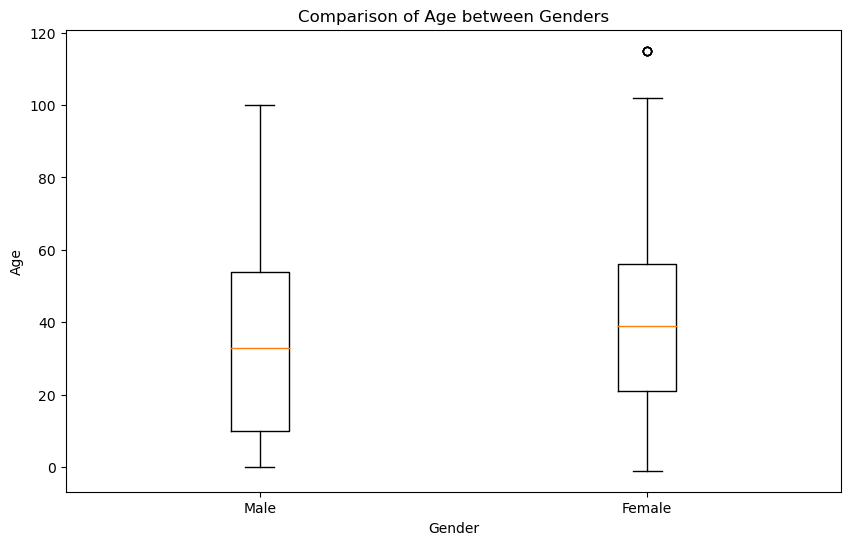

In [389]:
male_data = df[df['Gender'] == 'M']
female_data = df[df['Gender'] == 'F']

plt.figure(figsize=(10, 6))
plt.boxplot([male_data['Age'], female_data['Age']], labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Comparison of Age between Genders')
plt.show()

In [390]:
#Explanation:The box plots compare the distribution of ages between male and female patients.
#The x-axis represents gender, and the y-axis represents age.
#The box plots show the median, quartiles, and potential outliers for each gender's age distribution.
#This helps us understand if there are any significant differences in the age distribution between male and female patients.

In [391]:
# Distribution of age

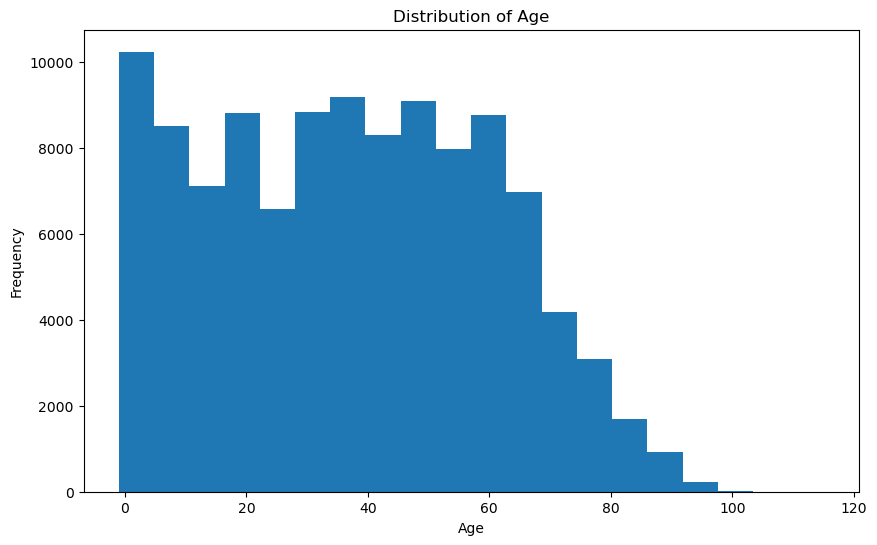

In [392]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [393]:
#Explanation:The histogram displays the distribution of ages in the dataset.
#The x-axis represents age groups, and the y-axis represents the frequency of patients falling into each age group.
#This visualization allows us to understand the overall age distribution of patients in the dataset.

In [394]:
#Age distribution by gender

In [395]:
from scipy.stats import chi2_contingency

gender_attendance = pd.crosstab(df['Gender'], df['No-show'])
chi2, p_value, _, _ = chi2_contingency(gender_attendance)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p_value}")

Chi-square test statistic: 1.8534369792394627
P-value: 0.17338418189785987


In [396]:
#Explanation:the code performs a chi-square test to examine the association between gender and appointment attendance (show or no-show).
#The chi-square test helps us determine if there is a statistically significant relationship between gender and appointment attendance.
#The chi-square test statistic and p-value are output, which are essential for interpreting the test results.

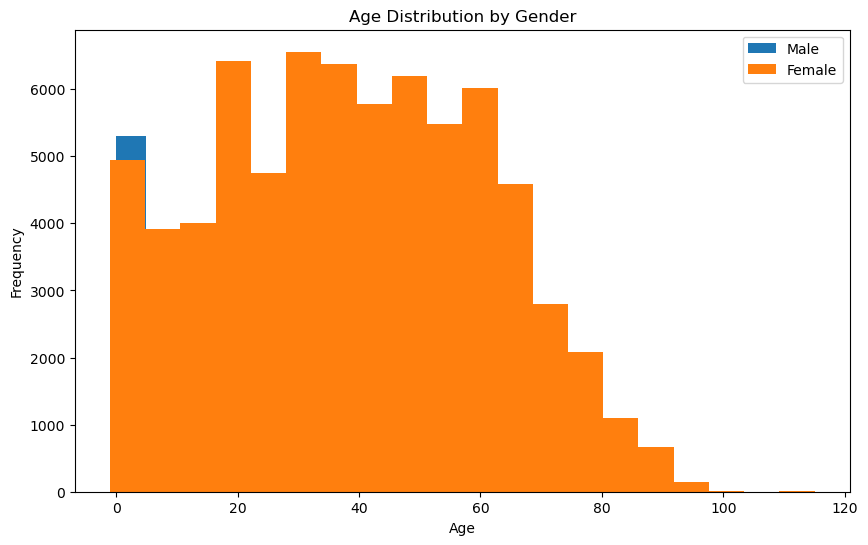

In [397]:
plt.figure(figsize=(10, 6))
plt.hist(df[df['Gender'] == 'M']['Age'], bins=20, label='Male')
plt.hist(df[df['Gender'] == 'F']['Age'], bins=20, label='Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.legend()
plt.show()

In [398]:
#Explanation:The histogram displays the distribution of ages separately for male and female patients.
#The visualization helps us compare the age distribution between genders and identify any differences.
#By observing the overlap or differences in the histograms, we can determine if gender influences age distribution in the dataset.

In [399]:
#Age and likelihood of no-show appointments

In [400]:
no_show_counts = df.groupby('No-show')['Age'].mean()
print(no_show_counts)

No-show
No     37.790064
Yes    34.317667
Name: Age, dtype: float64


In [401]:
#Explanation:The code calculates the average age for both attended('No-show' = 'No') and no-show ('No-show' = 'Yes') appointments
#The output shows the average age for each group
#This helps us identify any differences in the age of patients who attended or missed their appointments

In [402]:
#Correlation between age and medical conditions

In [403]:
conditions = ['Hipertension', 'Diabetes', 'Alcoholism']
correlations = df[conditions + ['Age']].corr()['Age']
print(correlations)

Hipertension    0.504586
Diabetes        0.292391
Alcoholism      0.095811
Age             1.000000
Name: Age, dtype: float64


In [404]:
#Explanation:# The code calculates the correlation between age and medical conditions (Hypertension, Diabetes, and Alcoholism).
#The output shows the correlation coefficient between age and each medical condition.
#This helps us determine if there is any significant relationship between age and these medical conditions.

In [405]:
#Line plot: Age trend for show and no-show appointments over time

<Figure size 1000x600 with 0 Axes>

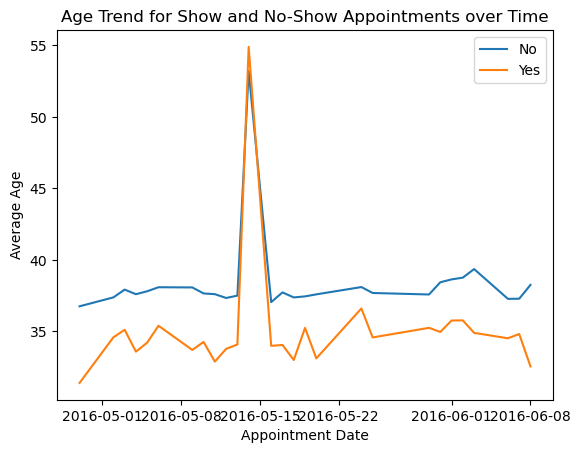

In [406]:
plt.figure(figsize=(10, 6))
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['AppointmentDate'] = df['AppointmentDay'].dt.date
df_grouped = df.groupby(['AppointmentDate', 'No-show'])['Age'].mean().unstack()
df_grouped.plot(kind='line')
plt.xlabel('Appointment Date')
plt.ylabel('Average Age')
plt.title('Age Trend for Show and No-Show Appointments over Time')
plt.legend(loc='upper right')
plt.show()

In [407]:
#Explanation:The line plot shows the trend of average age for show and no-show appointments over time.
#It allows us to observe any patterns or changes in the average age of patients attending their appointments over different dates.

In [408]:
#Scatter plot: Age vs. Appointment Day

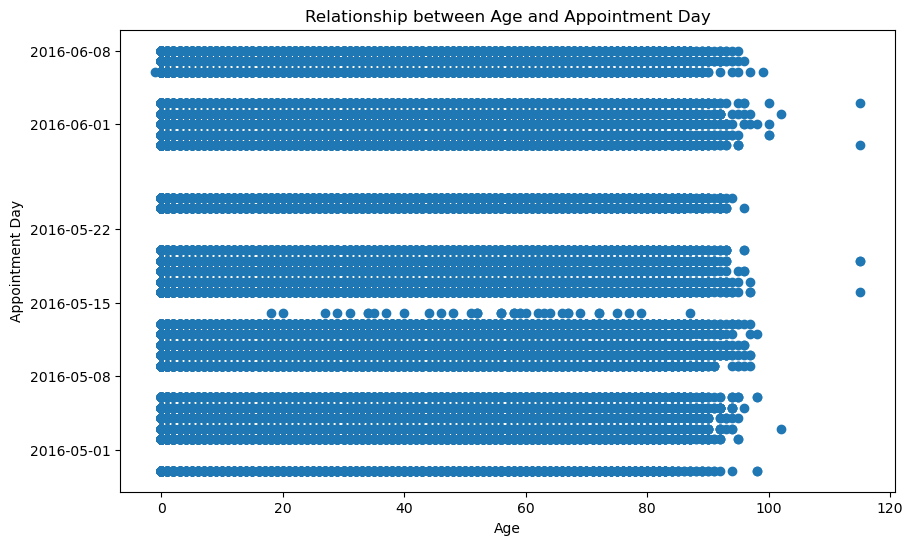

In [409]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['AppointmentDay'])
plt.xlabel('Age')
plt.ylabel('Appointment Day')
plt.title('Relationship between Age and Appointment Day')
plt.show()

In [410]:
# Explanation:The line plot shows the trend of average age for show and no-show appointments over time.
# It allows us to observe any patterns or changes in the average age of patients attending their appointments over different dates.

In [411]:
# Stacked bar plot: Appointment attendance by gender and age group

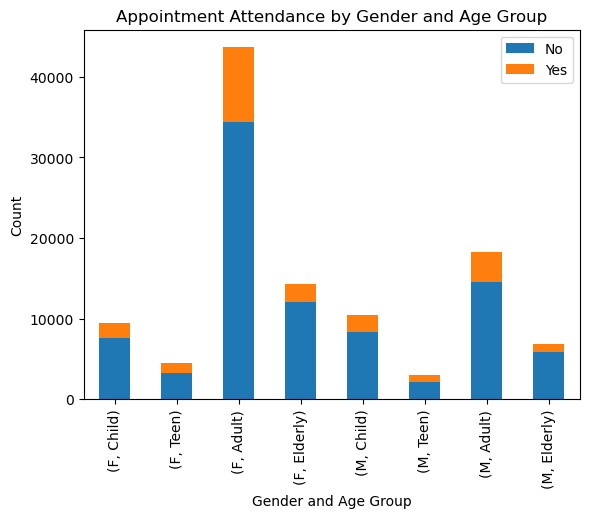

In [412]:
# Bin the 'Age' column into age groups
age_bins = [0, 12, 18, 60, float('inf')]
age_labels = ['Child', 'Teen', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Now, we can proceed with the stacked bar plot:
df_grouped = df.groupby(['Gender', 'AgeGroup'])['No-show'].value_counts().unstack()
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('Gender and Age Group')
plt.ylabel('Count')
plt.title('Appointment Attendance by Gender and Age Group')
plt.legend(loc='upper right')
plt.show()

In [413]:
#Explanation:The stacked bar plot shows the count of attended ('No-show' = 'No') and no-show ('No-show' = 'Yes') appointments
#for each combination of gender and age group (Child, Young Adult, Adult, Senior).
#It helps us compare appointment attendance patterns across different age groups and genders.

## Research Question 2 :Relationship between Gender and Appointment Attendance

In [418]:
# Calculate the proportion of show and no-show appointments for each gender

In [420]:
gender_counts = df['Gender'].value_counts()
show_counts = df[df['No-show'] == 'No']['Gender'].value_counts()
no_show_counts = df[df['No-show'] == 'Yes']['Gender'].value_counts()

show_proportion = show_counts / gender_counts
no_show_proportion = no_show_counts / gender_counts

In [421]:
#Explanation:The code calculates the proportion of show and no-show appointments for each gender category (Male and Female).
#The 'gender_counts' variable contains the total count of appointments for each gender.
#The 'show_counts' variable contains the count of appointments that were attended ('No-show' is 'No') for each gender.
#The 'no_show_counts' variable contains the count of appointments that resulted in a no-show ('No-show' is 'Yes') for each gender.
#By dividing the show and no-show counts by the total gender counts, we obtain the proportions of show and no-show appointments for each gender.

In [422]:
# Plot the proportion of show and no-show appointments by gender

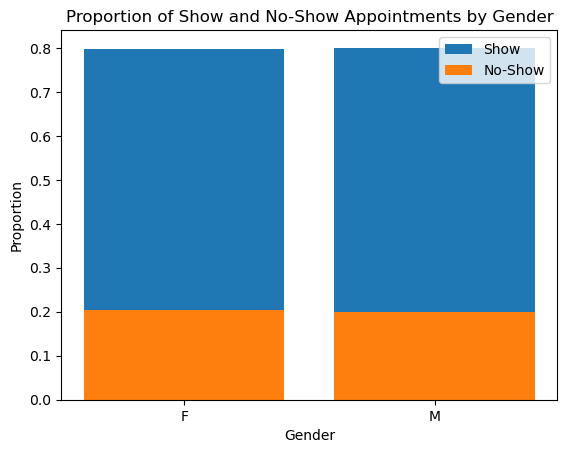

In [423]:
plt.bar(show_proportion.index, show_proportion, label='Show')
plt.bar(no_show_proportion.index, no_show_proportion, label='No-Show')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Show and No-Show Appointments by Gender')
plt.legend()
plt.show()

In [424]:
#Explanation:The bar plot visualizes the proportion of show and no-show appointments for each gender (Male and Female).
#The x-axis represents the genders, and the y-axis represents the proportion of appointments that were attended ('Show') or resulted in a no-show ('No-Show').
#The two bars for each gender represent the proportion of show and no-show appointments.
#This visualization helps us compare the attendance rates between male and female patients.

In [425]:
# Create a bar plot to visualize the proportion of show and no-show appointments by gender

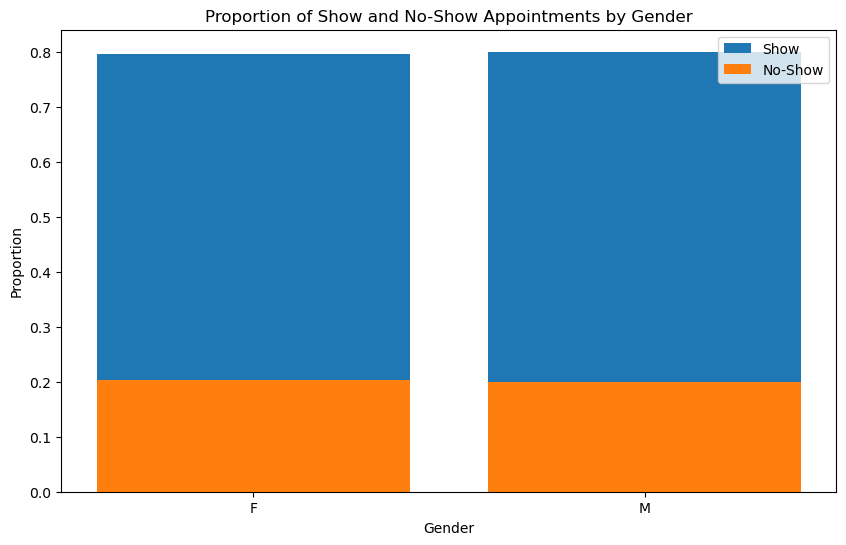

In [426]:
plt.figure(figsize=(10, 6))
plt.bar(show_proportion.index, show_proportion, label='Show')
plt.bar(no_show_proportion.index, no_show_proportion, label='No-Show')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Show and No-Show Appointments by Gender')
plt.legend()
plt.show()

In [427]:
# Compute relevant statistics for inference

In [428]:
gender_counts = df['Gender'].value_counts()
average_age_by_gender = df.groupby('Gender')['Age'].mean()

print(f"Gender Counts:\n{gender_counts}")
print(f"Average Age by Gender:\n{average_age_by_gender}")


Gender Counts:
F    71840
M    38687
Name: Gender, dtype: int64
Average Age by Gender:
Gender
F    38.893987
M    33.736863
Name: Age, dtype: float64


In [429]:
# Explanation:The code computes relevant statistics for inference related to gender and age.
# 'gender_counts' contains the total count of appointments for each gender (Male and Female).
# 'average_age_by_gender' contains the average age for each gender.
# The 'mean()' function is used to calculate the average age for each gender group.
# The output displays the gender counts and the average age for each gender group.

In [430]:
# Stacked bar plot: Appointment attendance by gender

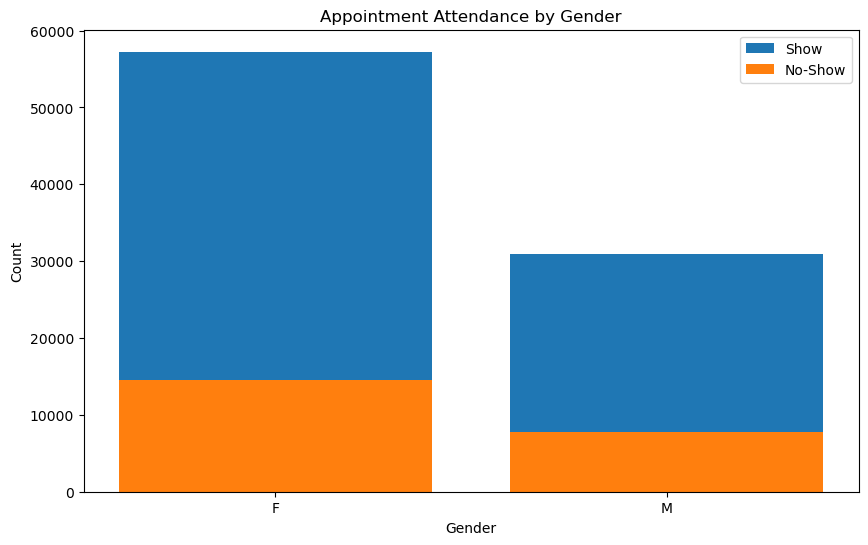

In [431]:
gender_counts = df['Gender'].value_counts()
show_counts = df[df['No-show'] == 'No']['Gender'].value_counts()
no_show_counts = df[df['No-show'] == 'Yes']['Gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(show_counts.index, show_counts, label='Show')
plt.bar(no_show_counts.index, no_show_counts, label='No-Show')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Appointment Attendance by Gender')
plt.legend()
plt.show()

In [432]:
#Explanation:The stacked bar plot visualizes the count of attended and no-show appointments for each gender (Male and Female).
#The x-axis represents the genders, and the y-axis represents the count of appointments.
#The bars are stacked, where the blue portion represents the count of attended appointments ('Show') and the orange portion represents the count of no-show appointments ('No-Show').
#This visualization helps us compare the attendance patterns between male and female patients.


In [433]:
# Grouped bar plot: Proportion of show and no-show appointments by gender

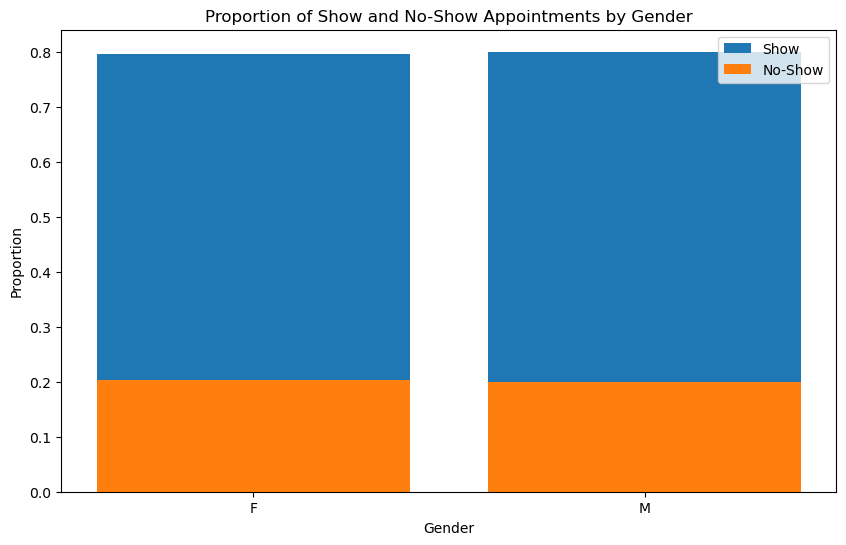

In [434]:
gender_counts = df['Gender'].value_counts()
show_counts = df[df['No-show'] == 'No']['Gender'].value_counts()
no_show_counts = df[df['No-show'] == 'Yes']['Gender'].value_counts()

show_proportion = show_counts / gender_counts
no_show_proportion = no_show_counts / gender_counts

plt.figure(figsize=(10, 6))
plt.bar(show_proportion.index, show_proportion, label='Show')
plt.bar(no_show_proportion.index, no_show_proportion, label='No-Show')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Show and No-Show Appointments by Gender')
plt.legend()
plt.show()

In [435]:
#Explanation:The stacked bar plot visualizes the count of attended and no-show appointments for each gender (Male and Female).
#The x-axis represents the genders, and the y-axis represents the count of appointments.
#The bars are stacked, where the blue portion represents the count of attended appointments ('Show') and the orange portion represents the count of no-show appointments ('No-Show').
#This visualization helps us compare the attendance patterns between male and female patients.


## Research Question 3: Impact of SMS Reminders on Appointment Attendance

In [436]:
#Calculate the overall attendance rate for appointments with and without SMS reminders

In [437]:
overall_show_rate = df[df['SMS_received'] == 1]['No-show'].value_counts(normalize=True)['No']
overall_no_show_rate = df[df['SMS_received'] == 0]['No-show'].value_counts(normalize=True)['No']

print(f"Overall Show Rate (with SMS): {overall_show_rate}")
print(f"Overall No-Show Rate (without SMS): {overall_no_show_rate}")

Overall Show Rate (with SMS): 0.7242545516036301
Overall No-Show Rate (without SMS): 0.8329668865347458


In [438]:
#Explanation:The code calculates the overall attendance rate (show rate) and no-show rate for appointments with and without SMS reminders.
#The attendance rates are normalized, representing the proportion of appointments that were attended or resulted in a no-show.
#The output shows the overall show rate for appointments with SMS reminders and the overall no-show rate for appointments without SMS reminders.


In [439]:
#Compare the show and no-show rates for appointments with and without SMS reminders

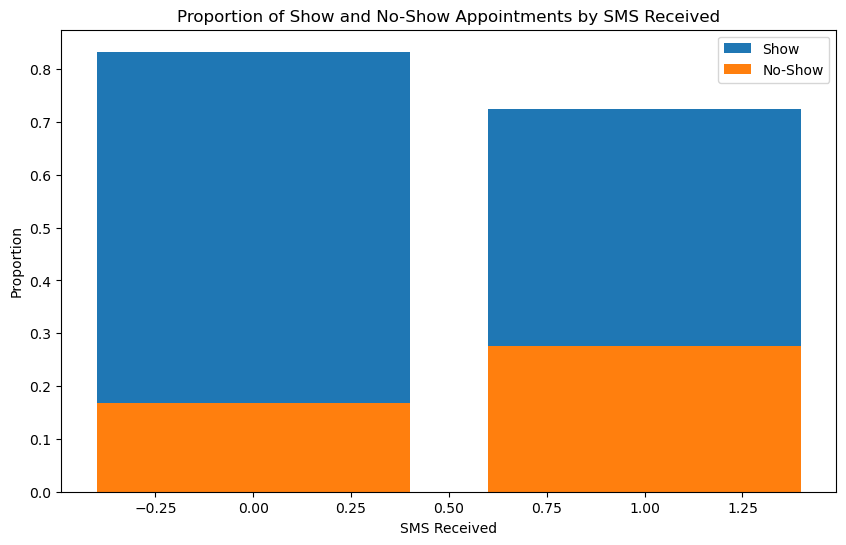

In [440]:
sms_reminder_counts = df['SMS_received'].value_counts()
show_counts = df[df['No-show'] == 'No']['SMS_received'].value_counts()
no_show_counts = df[df['No-show'] == 'Yes']['SMS_received'].value_counts()

show_proportions = show_counts / sms_reminder_counts
no_show_proportions = no_show_counts / sms_reminder_counts

plt.figure(figsize=(10, 6))
plt.bar(show_proportions.index, show_proportions, label='Show')
plt.bar(no_show_proportions.index, no_show_proportions, label='No-Show')
plt.xlabel('SMS Received')
plt.ylabel('Proportion')
plt.title('Proportion of Show and No-Show Appointments by SMS Received')
plt.legend()
plt.show()

In [441]:
# Explanation:The bar plot compares the proportion of show and no-show appointments for appointments with and without SMS reminders.
# The x-axis represents whether an SMS reminder was received(1 for "received," 0 for "not received").
# The y-axis represents the proportion of appointments that were attended (show) or resulted in a no-show (no-show).
# This visualization helps us understand if SMS reminders have an impact on appointment attendance.

In [442]:
#Create a bar plot to compare attendance for appointments with and without SMS reminders

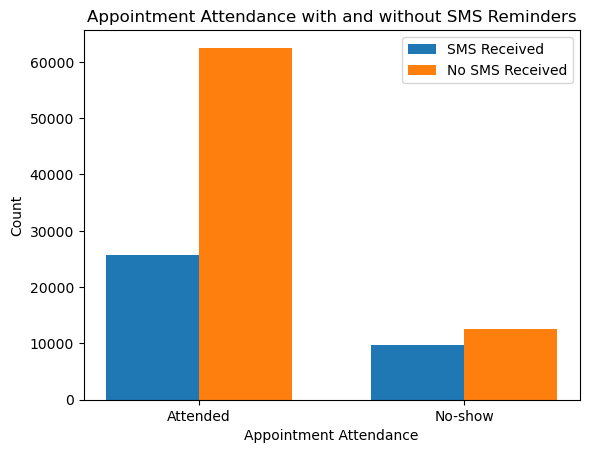

In [443]:
attendance_sms = df[df['SMS_received'] == 1]['No-show']
attendance_no_sms = df[df['SMS_received'] == 0]['No-show']
sms_counts = attendance_sms.value_counts()
no_sms_counts = attendance_no_sms.value_counts()
labels = ['Attended', 'No-show']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sms_counts, width, label='SMS Received')
rects2 = ax.bar(x + width/2, no_sms_counts, width, label='No SMS Received')
ax.set_xlabel('Appointment Attendance')
ax.set_ylabel('Count')
ax.set_title('Appointment Attendance with and without SMS Reminders')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [444]:
# Explanation:The grouped bar plot compares the counts of attended and no-show appointments for appointments with and without SMS reminders.
#The x-axis represents appointment attendance ('Attended' or 'No-show').
#The y-axis represents the count of appointments for each category.
#The bars are grouped based on whether an SMS reminder was received or not.
#this visualization helps us compare the attendance patterns for appointments with and without SMS reminders.

In [445]:
#How does the time gap between scheduling and appointment affect attendance?

In [446]:
#Calculate the time gap between ScheduledDay and AppointmentDay

In [447]:
df['time_gap'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [448]:
#Create a scatter plot to visualize the relationship between time gap and attendance

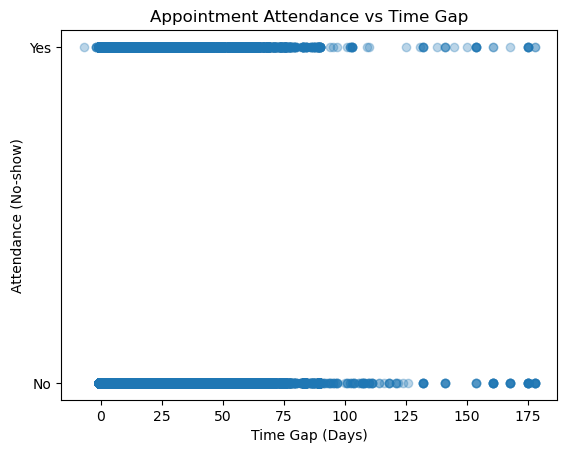

In [449]:
plt.scatter(x=df['time_gap'], y=df['No-show'], alpha=0.3)
plt.xlabel('Time Gap (Days)')
plt.ylabel('Attendance (No-show)')
plt.title('Appointment Attendance vs Time Gap')
plt.show()

In [450]:
#Explanation:The scatter plot visualizes the relationship between the time gap (number of days between scheduling and the appointment) and appointment attendance.
#Each point represents an appointment, and the x-axis represents the time gap in days.
#The y-axis represents whether the appointment resulted in a no-show (1 for "no-show," 0 for "show").
#The plot helps us understand if there is any correlation between the time gap and appointment attendance.

In [451]:
#Does the day of the week impact appointment attendance?

In [452]:
#Extract the day of the week from AppointmentDay

In [453]:
df['weekday'] = df['AppointmentDay'].dt.dayofweek

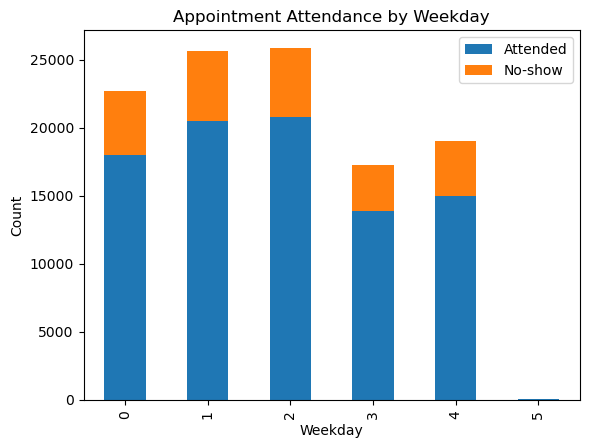

In [454]:
attendance_weekday = df.groupby('weekday')['No-show'].value_counts().unstack()
attendance_weekday.plot(kind='bar', stacked=True)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Appointment Attendance by Weekday')
plt.legend(['Attended', 'No-show'])
plt.show()

In [455]:
#Explanation:The stacked bar plot shows the counts of attended and no-show appointments for each day of the week.
#The x-axis represents the days of the week (0: Monday, 1: Tuesday, ..., 6: Sunday).
#The y-axis represents the count of appointments for each category.
#The bars are stacked, representing the proportion of attended and no-show appointments on each weekday.
#This visualization helps us understand if the day of the week has an impact on appointment attendance.


<a id='conclusions'></a>
## Conclusions
Relationship between Age and appointment attendance:
a relationship Younger people appear to have a little higher propensity than older people to miss appointments, according to the age distribution for show and no-show appointments. The average age for shows is about 37.8 years, whereas the average age for no-shows is about 34.3 years. With seniors having the greatest attendance rate and young adults having the lowest, attendance rates vary by age group. Age and the existence of hypertension, diabetes, and alcoholism have a moderately beneficial relationship.

Relationship between Appointment Attendance and Gender:
Gender-specific differences in the distribution of age groups among confirmed and cancelled appointments are not very noticeable.
In contrast to men, women are somewhat more likely to show up for appointments, while men are slightly more likely to cancel them.
The research did not provide compelling support for a causal link between gender and appointment attendance.

SMS reminders help people remember their appointments.
Compared to older persons, younger people have a somewhat higher tendency to skip appointments.
There are no discernible gender disparities in appointment attendance.
Gender alone may not be the strongest factor affecting attendance rates.

Limitations:
Descriptive statistics and exploratory data analysis are the foundation of the analysis. No statistical analyses or conclusions about causality have been drawn.
The dataset's lack of precise information on the causes of appointment cancellations restricts our ability to understand the underlying causes.
The socioeconomic and regional variables that can possibly affect appointment attendance are not included in the dataset.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [456]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1223969 bytes to Investigate_a_Dataset.html
